In [2]:
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

import time

from IPython.display import clear_output

**Task 1**

In [ ]:
for i in range(5):
    clear_output()
    print("{:d}/5".format(i+1)) 
    time.sleep(1)

5/5


In [18]:
# generating matrix with uniformly random elements

A = np.random.random((3,3))*2 - 1
A = A.T @ A

cov = np.linalg.inv(2*A)
mean = np.zeros(3)

N = 500

data = np.random.multivariate_normal(mean, cov, N)

u, s, vh = np.linalg.svd(data, full_matrices=True)

v1 = vh.T[:,0]*3
v2 = vh.T[:,1]*3
v3 = vh.T[:,2]*3

In [19]:
# Singular vectors of the data
print(vh.T)

[[-0.27700719  0.49471778 -0.82372407]
 [-0.0542248   0.84785618  0.52744627]
 [ 0.95933659  0.19077268 -0.20803629]]


In [20]:
# Eigensystem of Covariance matrix
print(np.linalg.eig(-A)[1])

[[ 0.82439982 -0.46803094 -0.31829541]
 [-0.5304154  -0.83509742 -0.14584856]
 [ 0.19754603 -0.28906631  0.93670499]]


Можно увидеть, что они не сильно отличаются, что не удивительно.

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
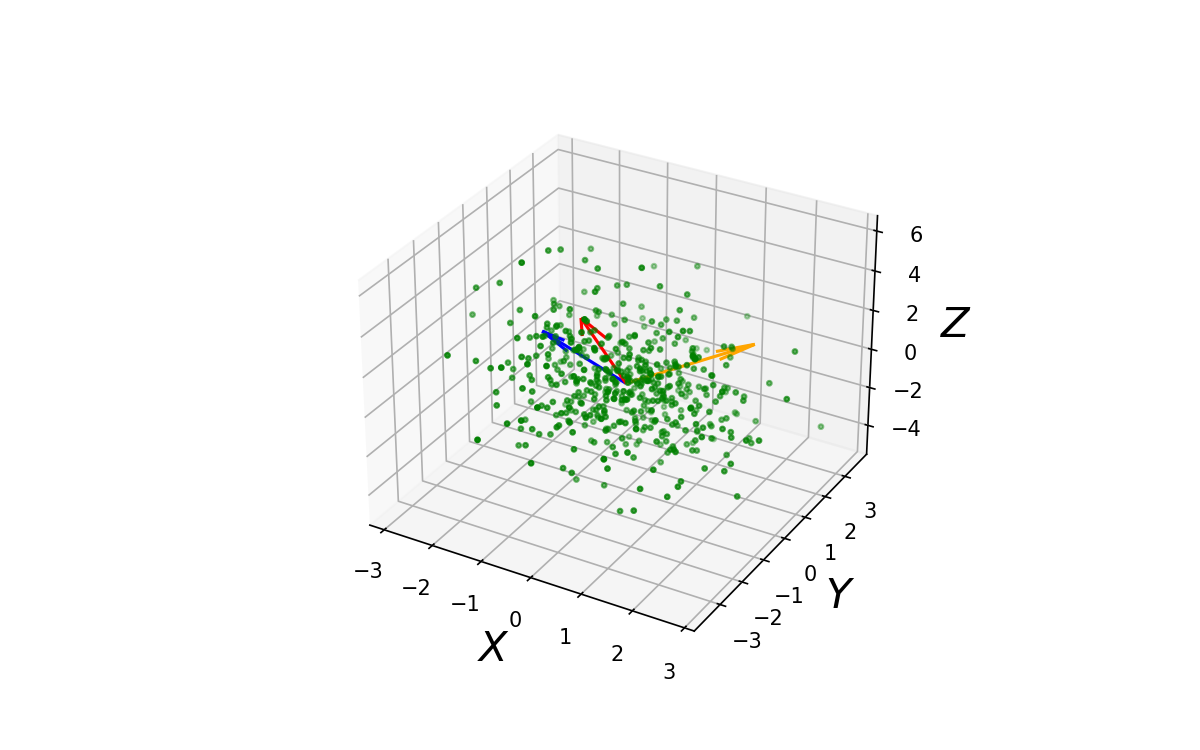

In [21]:
%matplotlib widget

fig = plt.figure(figsize=(8,5), dpi=150)
ax = fig.add_subplot(projection='3d')

ax.scatter3D(data[:,0], data[:,1], data[:,2], color='green', marker = '.')

ax.set_xlabel('$X$', fontsize=20)
ax.set_ylabel('$Y$', fontsize=20)
ax.set_zlabel('$Z$', fontsize=20)


ax.quiver(*[0,0,0],*v1, pivot='tail',color='red')
ax.quiver(*[0,0,0],*v2, pivot='tail',color='orange')
ax.quiver(*[0,0,0],*v3, pivot='tail',color='blue')
plt.show()

Здесь на графике можно увидеть визуализацию сингулярных векторов для нашего гауссового распределения

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
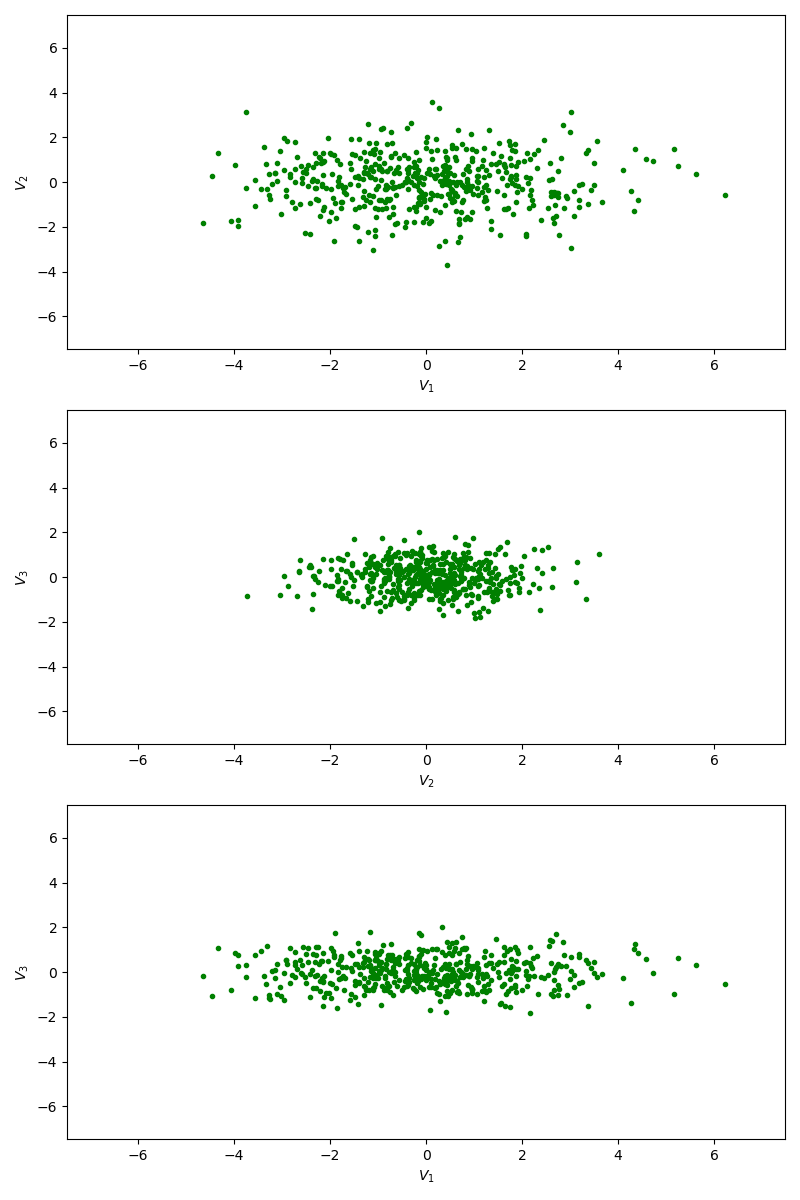

In [22]:
# Visualising the data projected into sum of singular vector

data_svd = data @ vh.T

fig, axs = plt.subplots(3, 1, figsize=(8,12), dpi=100)

limit = 1.2*np.absolute(max(data_svd.min(), data_svd.max(), key=abs))

axs[0].scatter(data_svd[:,0],data_svd[:,1],c='g',marker='.')
axs[1].scatter(data_svd[:,1],data_svd[:,2],c='g',marker='.')
axs[2].scatter(data_svd[:,0],data_svd[:,2],c='g',marker='.')

axs[0].set_xlabel('$V_1$')
axs[0].set_ylabel('$V_2$')
axs[1].set_xlabel('$V_2$')
axs[1].set_ylabel('$V_3$')
axs[2].set_xlabel('$V_1$')
axs[2].set_ylabel('$V_3$')

for i in range(3):
    axs[i].set_xlim([-limit,limit])
    axs[i].set_ylim([-limit,limit])

plt.tight_layout()
plt.show()


## **Task 2**

Пусть $X$ — матрица объект-признак (размерность $l \text{ × } F$), для которой сингулярное разложение имеет вид $X = V \sqrt{Λ} U^{\top}$ . После понижения размерности данных с помощью метода главных компонент, в диагональной матрице
$Λ = \text{diag} \{ λ_1 ≥ · · · ≥ λ_\tilde{F} \}$ оставляются только $\tilde{F}$ наибольших сингулярных чисел: $\tilde{Λ} =
\text{ diag}\{λ_1 ≥ · · · ≥ λ_\tilde{F} \}$. При
этом данные, как правило, можно восстановить только с некоторой ошибкой: $\tilde{X} = V \sqrt{\tilde{Λ}} U^{\top}$.
Покажите, что $L_2$ норма ошибки выражается через сумму по оставшимся сингулярным числам:

$$
\|X-\tilde{X}\|^{2}=\sum_{i=\tilde{F}+1}^{F} \lambda_{i}
$$


**Решение:**

Здесь в задаче подразумевается норма-Фробениуса:
$$ \| X \|^2 = \text{ tr } ( X^{T} X ) $$
Тогда, посчитаем:
$$\| V (\sqrt{Λ} -  \sqrt{\tilde{Λ}}) U^{\top} \|^2 = \text{ trace } \left( \left(  U (\sqrt{Λ^{T}} -  \sqrt{\tilde{Λ}^{T}}) V^{\top}  \right) \left( V (\sqrt{Λ} -  \sqrt{\tilde{Λ}}) U^{\top} \right) \right) = \text{ tr } \left(  (\sqrt{Λ^{T}} -  \sqrt{\tilde{Λ}^{T}})(\sqrt{Λ} -  \sqrt{\tilde{Λ}})  \right)  =  \text{ tr } \left(  (\sqrt{Λ} -  \sqrt{\tilde{Λ}})^2\right) =  \text{ tr } \left(  (Λ -  \tilde{Λ})\right) =\sum_{i=\tilde{F}+1}^{F} \lambda_{i} $$
Что и требовалось доказать.



## **Task 3**

Покажите, что сингулярный вектор матрицы $X$, отвечающий наибольшему сингулярному числу, является решением
задачи максимизации $L_2$ нормы:

$$
\mathbf{u} = \text{argmax}_{\| \mathbf{u} \| = 1} \| X \mathbf{u} \|^{2}
$$

**Решение:** Действительно, расписав действие оператора $X$ на вектор $a$ в базисе собственных векторов $U$ : $v_i$  получаем,



$$\left\|X \mathbf{a} \right\|^{2}=\left\|V \sqrt{\Lambda} U^{\top} \mathbf{a}\right\|^{2}=\left\|\sqrt{\Lambda} U^{\top} \mathbf{a} \right\|^{2}=\| \sqrt{\Lambda} \sum_{i} v_{i} d_{i} \|^{2}=\\
=\left\|\sum_{i} \sqrt{\lambda}_{i}^{T} a_{i} v_{i}\right\|^{2}=\sum_{i}\left(\sqrt{\lambda_{i}^{2}} a_{i}^{2}\right) \xrightarrow{\max} \lambda_{0} = \sigma_{0}^{2} \text { if } a_{0}=1 $$

## **Task 4**

Пусть дан набор точек на плоскости $(x_i , y_i )$, для которых выборочные средние $x_i$ и $y_i$ равны нулю. Покажите, что
сингулярный вектор для матрицы объект-признак, отвечающий наибольшему сингулярному числу, задает прямую
$a$ (проходящую через начало координат), которая является решением следующей задачи оптимизации:

$$
L^{\prime}=\sum_{i=1}^{N} \text { distance }^{2}\left[\left(x_{i}, y_{i}\right) ; a\right] \rightarrow \min _{a}
$$


где $\text{distance}[(x_i , y_i ); a]$ — расстояние от точки $(x_i , y_i)$ до прямой $a$ (равное длине перпендикуляра).
Обратите внимание, что такая задача отличается от задачи МНК, в которой расстояние от точки до аппрокси-
мирующей прямой вычисляется не по перпендикуляру, а вдоль оси $y$, отвечающей целевой переменной.

**Решение:** 
$$
L^{\prime}=\sum_{i=1}^{N} \text { distance }^{2}\left[\left(x_{i}, y_{i}\right) ; a\right] = \sum_i (x_i^2 + y_i^2) - (v_i \cdot a)^2 = \text{const}(X) - \| X a \|^2 =  \text{const}(X) - L
$$
Где $X = \left[\mathbf{x}, \mathbf{y}\right]$
Тогда при минимизации $L^{\prime}$ на самом деле происходит максимизация $L$. 
Как известно решением последнего будет единичный сингулярный вектор с максимальным сингулярным значением. Тогда и $a = v_0$




## **Task 5**

Пусть дан набор из $N$ точек в трехмерном пространстве $X_{iα}$ , $ i ∈ {1, . . . , N }, \ α ∈ {1, 2, 3}.$ Покажите, что задача
нахождения сингулярных чисел матрицы $X$ эквивалентна нахождению главных моментов инерции твердого тела,
составленного из набора точечных масс, расположенных в точках $(X_{i1} , X_{i2} , X_{i3} )$ (можно представлять себе, что
точечные массы соединены между собой невесомыми и абсолютно жесткими стержнями).

**Решение:**

Замечу, что тензор инерции системы точечных одинаковых масс в исходных координатах перезаписывается в виде:  $$ I = X X^{\top} = \left[ \sum_{\alpha} X_{i \alpha} X_{j \alpha} \right] $$
Матрица симметрична и положительно определена, ее собственных значение и сингулярные отличаются возведением в квадрат. 
Собственные значения тензора инерции соответствуют значениям главных компонент, а значит исходные задачи эквивалентны.